# Graf arytmetyczny

## Cel pracy: Ilustracja rezultatu ważnej częsci procesu oszacowywania wyrażeń arytmetycznych - pobudowania drzewa składniowego (w naszej implementacji nazywamy go grafem arytmetycznym)

### Opis zagadnienia: Program implementuje REPL pętlę, która przyjmuje na wejściu wyrażenie arytmetyczne, a na wyjściu wyświetla graf arytmetyczny, reprezentujący dane wyrażenie. Graf arytmetyczny (rodzaj dzewa składniowego) to jest rekurencyjna struktura danych pomagająca oszacować wyrażenia arytmetyczne w notacji infiksowej (wewnętrznie korzystując się notacją posfiksową - także nazywana odwrotną notacją polską)

#### Krótkie definicje terminów i pojęć wykorzystywanych dalej w opisie

* **REPL** (ang. read-eval-print loop) – proste, interaktywne środowisko programowania. Popularne przykłady to wiersz poleceń powłoki również środowiska języków programowania takich jak Python, Ruby, Haskell, Scheme, Clojure i wielu innych. Praktycznie każdy język uruchamiany jako interpreter posiada REPL. Dzięki REPL użytkownik może wprowadzać polecenia, które zostaną wykonane a ich wynik wypisany na ekran.
* **Wyrażenie arytmetyczne** – w językach programowania dowolne wyrażenie typu liczbowego. Może być ono złożone ze zmiennych, liczb, symboli działań itp.
* **Drzewo składniowe**, drzewo **AST** (ang. abstract syntax tree) czyli drzewo składni abstrakcyjnej - drzewo etykietowane, wynik przeprowadzenia analizy składniowej zdania (słowa) zgodnie z pewną gramatyką. Każdy węzeł wewnętrzny tego drzewa reprezentują pewną konstrukcję języka, a jego synowie znaczące składowe tej konstrukcji.
* **Zapis infiksowy** (zapis wrostkowy) – klasyczny sposób zapisywania wyrażeń z binarnymi (dwuargumentowymi) operacjami arytmetycznymi (dodawanie, mnożenie, potęgowanie, itd.).
* **Odwrotna notacja polska** (ONP, ang. reverse Polish notation, RPN) – sposób zapisu wyrażeń arytmetycznych, w którym znak wykonywanej operacji umieszczony jest po operandach (zapis postfiksowy), a nie pomiędzy nimi jak w konwencjonalnym zapisie algebraicznym (zapis infiksowy) lub przed operandami jak w zwykłej notacji polskiej (zapis prefiksowy). Zapis ten pozwala na całkowitą rezygnację z użycia nawiasów w wyrażeniach, jako że jednoznacznie określa kolejność wykonywanych działań.
* **Token** – pojedynczy element w języku programowania. Tokenem może być jakieś słowo, operator lub znak interpunkcyjny.


#### Instrukcja obsługi
1. Uruchomić program (w środowisku *jupyter notebook* nacisnąć przycisk **Run**) - musi się pojawić okno proszące o wprowadzenie wyrażenia.
2. Wpowadzić wyrażenie. Dozwolone symbole: 0-9, +, -, *, /, %, A-Z, a-z, (, ), [spacja]. Wyrażenie musi być w notacji infiksowej (niezapomnieć nacisnąć Enter). I zaczekać na pojawienie się obrazu z grafem arytmetycznym reprezentującym wprowadzone wyrażenie.
3. Aby zakończyć sesje z programem wpisz "koniec zabawy" lub "q" (od ang. quit)

#### Przykładowa sesja z programem:
1. Uruchamiamy program za pomocą przycisku **Run**
![run](../img/run.png)
2. Wprowadzamy wyrażenie: ``(2 + 2.7182) * x``
3. Widzimy rezultat:
![przykład](../img/przyklad.png)
4. Wprowadzamy następne wyrażenie: ``8 / 2 % (9 - 1)``
5. Znowu widzimy rezultat:
![przykład2](../img/przyklad2.png)
6. Wrowadzamy zamiast wyrażenia "koniec zabawy"
7. Program odpowiada "Zabawa się skończyła" i już
![koniec](../img/koniec.png)

#### Detale implementacji
Program składa się z 4 głownych modułów:
1. moduł czytania i analizy leksykczej danych wejściowych użytkownika - prościej mowiąc czytamy wyrażenie arytmetyczne i przetwarzamy go w listę mieszczącą leksemy i dodatkowe informacje o nich.
2. moduł tłumaczenia notacji infiksowej na ONP - wewnętrznie wykorzystuje algorytm Edsgera Dijkstry - shunting yard algorithm.
3. moduł budowania grafu arytmetycznego z listy tokenów za pomocą biblioteki networkx.
4. moduł malowania grafu
    * znaczenie colorów wierzchołków:
        * zółty - oznacza początek grafu (korzeń drzewa składniowego)
        * zielony - operatory (symbole działania)
        * niebieski - liczby
        * czerwony - zmienne
    * znaczenie numerów krawedzi
        * liczby na krawędziach reprezentują kolejność wykonywania działań, im mniejsza liczba tym operacja będzie miała większy priorytet. Tak jak program przyjmuje jako wejście wyrażenia tylko z operatorami binarnymi krawędz moje mieć numer "1" lub "2".

#### Linki

1. [netwokx](https://networkx.github.io/documentation/stable/tutorial.html)
2. [matplotlib](https://matplotlib.org/)
3. https://www.python.org/
4. https://www.wikipedia.org/
5. [wykorzystywany styl komentowania kodu](https://www.cs.swarthmore.edu/~newhall/unixhelp/c_codestyle.html)

Wprowadz wyrażenie matematyczne: 2 - 3 * (2             + 2)


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


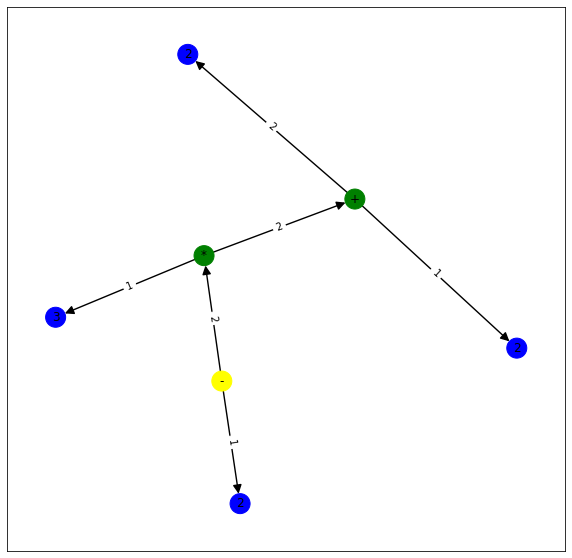

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from utils.tokenize import tokenize
from utils.shunting_yard import convert
from utils.ast import create_graph
from utils.draw import draw

user_input = input("Wprowadz wyrażenie matematyczne: ")

# Pętla prosi użytkownika o wpisanie wyrażenia arytmetycznego (lub "koniec zabawy" albo "q", aby wyjść)
# następnie tworzy w 3-ech krokach graf arytmetyczny i maluje go
while user_input.lower() != "koniec zabawy" and user_input.lower() != "q":
    plt.figure(figsize=(10,10))
    # Maluje graf arytmetyczny
    draw(
        # Krok № 3 funkcja stwarza objekt klasy DiGraph (z bibloteki networkx) przedstawiający
        # graf arytmetyczny
        create_graph(
            # Krok № 2 funkcja przyjmuje jako argument listę tokenów w notacji infiksowej
            # i przetwarza go w odwrotną notacje polską (też w formie listy tokenów)
            convert(
                # Krok № 1 funkcja przyjmuje jako argument tekst arytmetycznego wyrarzenia
                # i przetwarza go w formę listy (tablicy) tokenów
                tokenize(user_input)
            )
        )
    )
    plt.show()
    user_input = input("Wprowadz wyrażenie matematyczne: ")
    
print("\nZabawa się skończyła")

## Wnioski i podsumowanie